In [5]:
import os
import tarfile
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
from dpipe.io import load, save
from torch.utils.data import random_split
from torchvision.datasets import ImageFolder
from torchvision.datasets.utils import download_url
from torchvision.transforms import ToTensor
from tqdm import tqdm
from transformers import AutoImageProcessor, AutoModel

from alssl.data.cifar10 import DATA_PATH, get_dataset

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [6]:
COLORS = [
    "Red",
    "Green",
    "Blue",
    "Yellow",
    "Cyan",
    "Magenta",
    "Orange",
    "Purple",
    "Indigo",
    "Pink",
]

CLASSES = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

In [7]:
ROOT = Path("/shared/projects/active_learning/embeddings/cifar10/dinov2/train/")

all_embeddings = load(ROOT / "all_embeddings.npy")
all_labels = load(ROOT / "all_labels.npy")
colors = [COLORS[i] for i in all_labels]

explained_variance_ratio:  0.07895713299512863


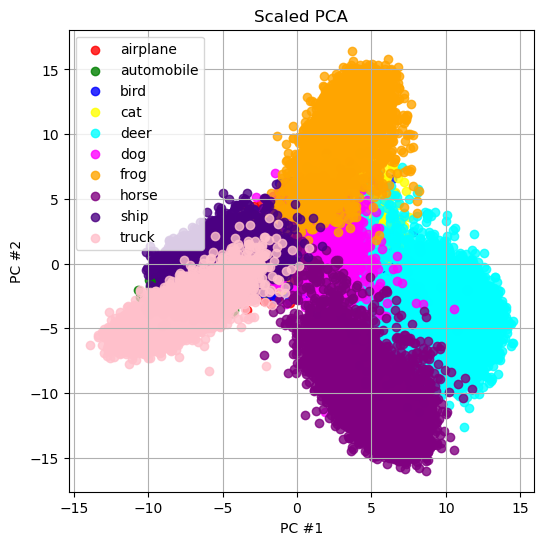

In [24]:
pca = make_pipeline(StandardScaler(), PCA(n_components=2))
pca.fit(all_embeddings)
pca_embedded_2d = pca.transform(all_embeddings)

print("explained_variance_ratio: ", sum((pca[1].explained_variance_ratio_)))

plt.figure(figsize=(6, 6))

for i in range(10):
    x, y = np.moveaxis(pca_embedded_2d[5000 * i : 5000 * (i + 1)], -1, 0)
    plt.scatter(x, y, color=COLORS[i], alpha=0.8, label=CLASSES[i])

plt.title('Scaled PCA')
plt.xlabel("PC #1")
plt.ylabel("PC #2")
plt.legend(loc="upper left")
plt.grid()
plt.show()

explained_variance_ratio:  0.08585821837186813


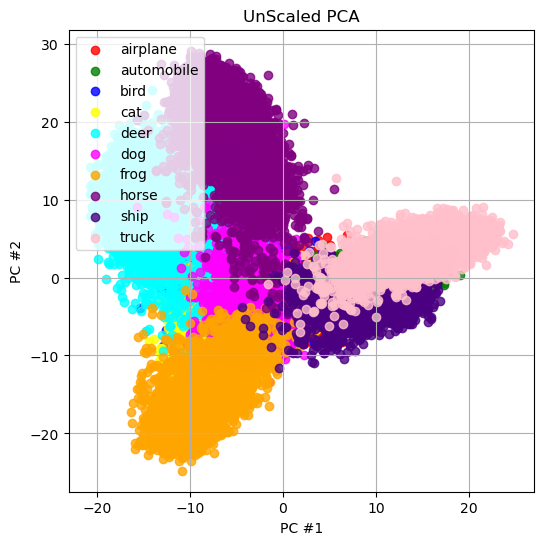

In [26]:
pca = PCA(n_components=2)
pca.fit(all_embeddings)
pca_embedded_2d = pca.transform(all_embeddings)

print("explained_variance_ratio: ", sum((pca.explained_variance_ratio_)))

plt.figure(figsize=(6, 6))

for i in range(10):
    x, y = np.moveaxis(pca_embedded_2d[5000 * i : 5000 * (i + 1)], -1, 0)
    plt.scatter(x, y, color=COLORS[i], alpha=0.8, label=CLASSES[i])


plt.title('UnScaled PCA')
plt.xlabel("PC #1")
plt.ylabel("PC #2")
plt.legend(loc="upper left")
plt.grid()
plt.show()